In [1]:
# Import Libraries

from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'target']

#Standardising features
x = StandardScaler().fit_transform(x)

In [4]:
# Do the PCA.

n=4
pca = PCA(n_components=n)
pct = pca.fit_transform(x)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df['PC' + str(i + 1)] = pct[:, i]

display(df.head())

,sepal length,sepal width,petal length,petal width,target,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


In [5]:
df_original = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df_original.head()
df_original = df_original.iloc[:, :4]
df_original.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
check_loadings_pca = pca.components_

In [7]:
check_loadings_pca

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [8]:
check_eigenValues_pca = pca.explained_variance_ratio_

In [9]:
check_eigenValues_pca

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get component loadings (correlation coefficient between original variables and the component) 

num_pc = 4
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_original.columns.values
check_loadings_df = check_loadings_df.set_index('variable')
check_loadings_df

,PC1,PC2,PC3,PC4
variable,,,,
sepal length,0.522372,0.372318,-0.721017,-0.261996
sepal width,-0.263355,0.925556,0.242033,0.124135
petal length,0.581254,0.021095,0.140892,0.801154
petal width,0.565611,0.065416,0.633801,-0.523546


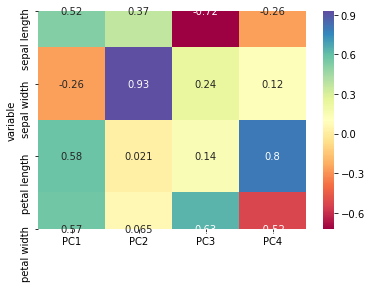

In [11]:
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


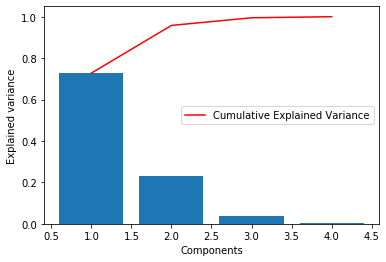

In [12]:
plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='middle right')

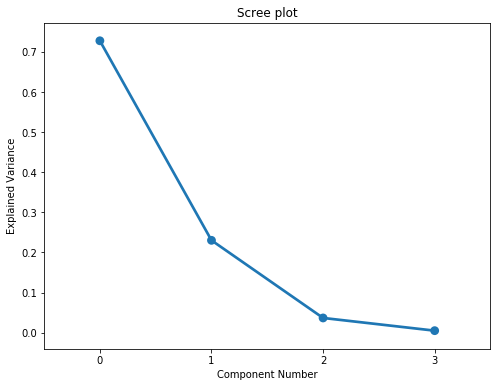

In [13]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


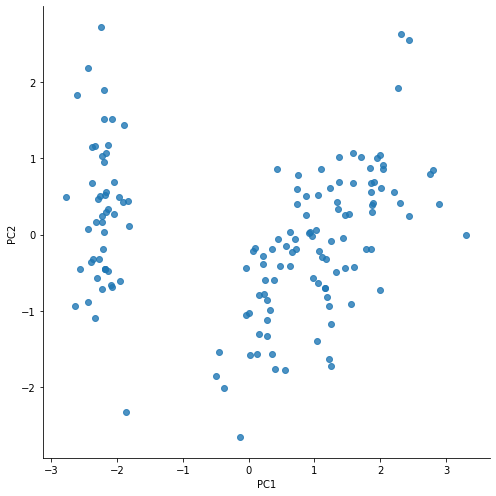

In [14]:
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [15]:
print(df.columns.values[0])
print(df.columns.values[1])
print(df.columns.values[2])
print(df.columns.values[3])

sepal length
sepal width
petal length
petal width


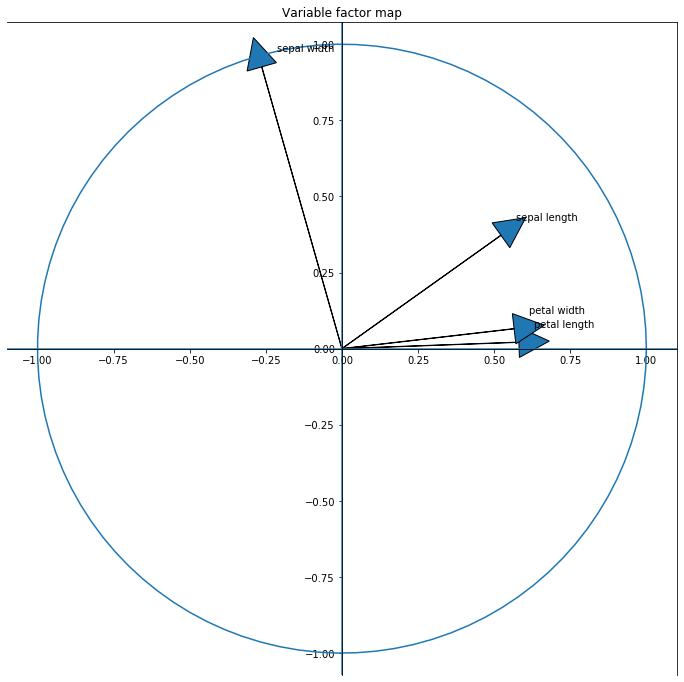

In [16]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

In [17]:
df2 = df[['PC1','PC2']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)

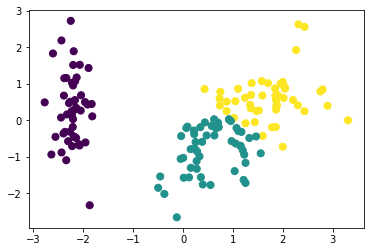

In [18]:
x = df2['PC1'].astype('float32')
y = df2['PC2'].astype('float32')
c = y_kmeans.astype('float32')

plt.scatter(x, y, c=c, s=50, cmap='viridis')


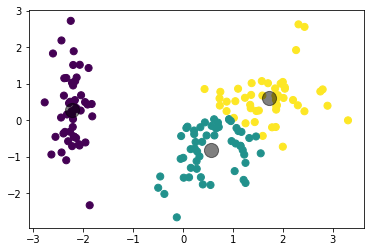

In [19]:
plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

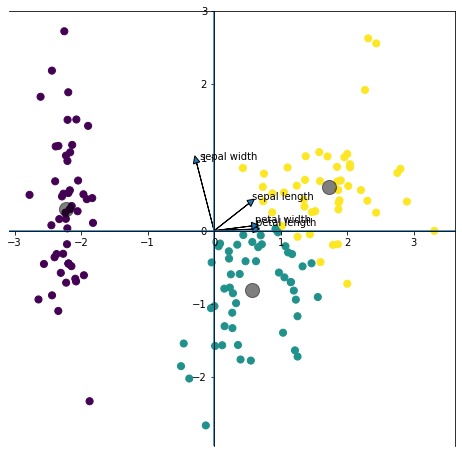

In [20]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, len(pca.components_)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])                   

# Name of columns = Name of features

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線

plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


plt.show()

In [21]:
df.head()

,sepal length,sepal width,petal length,petal width,target,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


In [22]:
df2.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [23]:
df3 = df.drop(['target', 'PC1', 'PC2', 'PC3', 'PC4'], axis=1)
df3.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


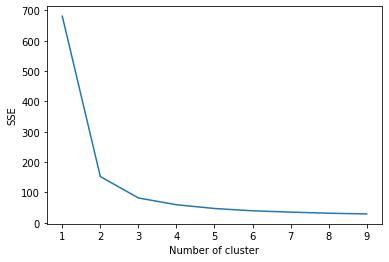

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df3)
    df3["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
df2['cluster'] = y_kmeans
df2.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,cluster
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [26]:
df2.cluster.unique()

array([0, 2, 1], dtype=int64)

In [27]:

df2['sepal length'] = df['sepal length']
df2['sepal width'] = df['sepal width']
df2['petal length'] = df['petal length']
df2['petal width'] = df['petal width']
df4 = df2.drop(['PC1', 'PC2'], axis=1)
df4.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,cluster,sepal length,sepal width,petal length,petal width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [28]:
df4.cluster.unique()

array([0, 2, 1], dtype=int64)

In [29]:
df2.head()

,PC1,PC2,cluster,sepal length,sepal width,petal length,petal width
0,-2.264542,0.505704,0,5.1,3.5,1.4,0.2
1,-2.086426,-0.655405,0,4.9,3.0,1.4,0.2
2,-2.367950,-0.318477,0,4.7,3.2,1.3,0.2
3,-2.304197,-0.575368,0,4.6,3.1,1.5,0.2
4,-2.388777,0.674767,0,5.0,3.6,1.4,0.2


In [30]:
df00 = df4.loc[df4['cluster'] == 0]
df00

,cluster,sepal length,sepal width,petal length,petal width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
5,0,5.4,3.9,1.7,0.4
6,0,4.6,3.4,1.4,0.3
7,0,5.0,3.4,1.5,0.2
8,0,4.4,2.9,1.4,0.2
9,0,4.9,3.1,1.5,0.1


In [31]:
df01 = df4.loc[df4['cluster'] == 1]
df01

,cluster,sepal length,sepal width,petal length,petal width
53,1,5.5,2.3,4.0,1.3
54,1,6.5,2.8,4.6,1.5
55,1,5.7,2.8,4.5,1.3
57,1,4.9,2.4,3.3,1.0
58,1,6.6,2.9,4.6,1.3
59,1,5.2,2.7,3.9,1.4
60,1,5.0,2.0,3.5,1.0
61,1,5.9,3.0,4.2,1.5
62,1,6.0,2.2,4.0,1.0
63,1,6.1,2.9,4.7,1.4


In [32]:
df02 = df4.loc[df4['cluster'] == 2]
df02

,cluster,sepal length,sepal width,petal length,petal width
50,2,7.0,3.2,4.7,1.4
51,2,6.4,3.2,4.5,1.5
52,2,6.9,3.1,4.9,1.5
56,2,6.3,3.3,4.7,1.6
65,2,6.7,3.1,4.4,1.4
70,2,5.9,3.2,4.8,1.8
75,2,6.6,3.0,4.4,1.4
76,2,6.8,2.8,4.8,1.4
77,2,6.7,3.0,5.0,1.7
85,2,6.0,3.4,4.5,1.6


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df00['sepal length'] = MinMaxScaler().fit_transform(df00[['sepal length']])
df00['sepal width'] = MinMaxScaler().fit_transform(df00[['sepal width']])
df00['petal length'] = MinMaxScaler().fit_transform(df00[['petal length']])
df00['petal width'] = MinMaxScaler().fit_transform(df00[['petal width']])
df00

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,cluster,sepal length,sepal width,petal length,petal width
0,0,0.533333,0.571429,0.444444,0.2
1,0,0.400000,0.333333,0.444444,0.2
2,0,0.266667,0.428571,0.333333,0.2
3,0,0.200000,0.380952,0.555556,0.2
4,0,0.466667,0.619048,0.444444,0.2
5,0,0.733333,0.761905,0.777778,0.6
6,0,0.200000,0.523810,0.444444,0.4
7,0,0.466667,0.523810,0.555556,0.2
8,0,0.066667,0.285714,0.444444,0.2
9,0,0.400000,0.380952,0.555556,0.0


In [34]:
df01['sepal length'] = MinMaxScaler().fit_transform(df01[['sepal length']])
df01['sepal width'] = MinMaxScaler().fit_transform(df01[['sepal width']])
df01['petal length'] = MinMaxScaler().fit_transform(df01[['petal length']])
df01['petal width'] = MinMaxScaler().fit_transform(df01[['petal width']])
df01

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,cluster,sepal length,sepal width,petal length,petal width
53,1,0.352941,0.3,0.384615,0.214286
54,1,0.941176,0.8,0.615385,0.357143
55,1,0.470588,0.8,0.576923,0.214286
57,1,0.000000,0.4,0.115385,0.000000
58,1,1.000000,0.9,0.615385,0.214286
59,1,0.176471,0.7,0.346154,0.285714
60,1,0.058824,0.0,0.192308,0.000000
61,1,0.588235,1.0,0.461538,0.357143
62,1,0.647059,0.2,0.384615,0.000000
63,1,0.705882,0.9,0.653846,0.285714


In [35]:
df02['sepal length'] = MinMaxScaler().fit_transform(df02[['sepal length']])
df02['sepal width'] = MinMaxScaler().fit_transform(df02[['sepal width']])
df02['petal length'] = MinMaxScaler().fit_transform(df02[['petal length']])
df02['petal width'] = MinMaxScaler().fit_transform(df02[['petal width']])
df02

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,cluster,sepal length,sepal width,petal length,petal width
50,2,0.55,0.538462,0.12,0.000000
51,2,0.25,0.538462,0.04,0.090909
52,2,0.50,0.461538,0.20,0.090909
56,2,0.20,0.615385,0.12,0.181818
65,2,0.40,0.461538,0.00,0.000000
70,2,0.00,0.538462,0.16,0.363636
75,2,0.35,0.384615,0.00,0.000000
76,2,0.45,0.230769,0.16,0.000000
77,2,0.40,0.384615,0.24,0.272727
85,2,0.05,0.692308,0.04,0.181818


In [36]:
mean_df00 = df00.mean()
print(mean_df00)
mean_df01 = df01.mean()
print(mean_df01)
mean_df02 = df02.mean()
print(mean_df02)

cluster         0.000000
sepal length    0.470667
sepal width     0.532381
petal length    0.515556
petal width     0.288000
dtype: float64
cluster         1.000000
sepal length    0.530522
sepal width     0.673585
petal length    0.526851
petal width     0.295148
dtype: float64
cluster         2.000000
sepal length    0.440426
sepal width     0.458265
petal length    0.444255
petal width     0.520309
dtype: float64


In [37]:
list_mean_df00 = mean_df00.tolist() 
list_mean_df01 = mean_df01.tolist() 
list_mean_df02 = mean_df02.tolist()

In [38]:
list_mean_df00_nc = list_mean_df00.pop(0)
list_mean_df01_nc = list_mean_df01.pop(0)
list_mean_df02_nc = list_mean_df02.pop(0)

In [39]:
print(list_mean_df00)
print(list_mean_df01)
print(list_mean_df02)

[0.47066666666666707, 0.5323809523809521, 0.5155555555555554, 0.28799999999999987]
[0.5305216426193121, 0.6735849056603775, 0.5268505079825834, 0.29514824797843664]
[0.4404255319148935, 0.45826513911620315, 0.44425531914893607, 0.5203094777562861]


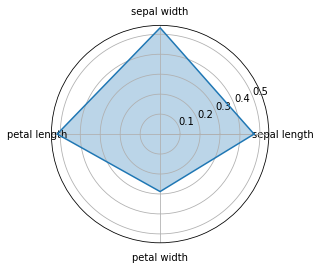

In [40]:
from math import pi

categories = ['sepal length', 'sepal width', 'petal length', 'petal width']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

list_mean_df00 += list_mean_df00[:1]
angles0 += angles0[:1]

plt.polar(angles0, list_mean_df00)
# color the area inside

plt.fill(angles0, list_mean_df00, alpha=0.3)
plt.xticks(angles0, categories)


plt.show()

In [41]:
angles0

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

In [42]:
list_mean_df00

[0.47066666666666707,
 0.5323809523809521,
 0.5155555555555554,
 0.28799999999999987,
 0.47066666666666707]

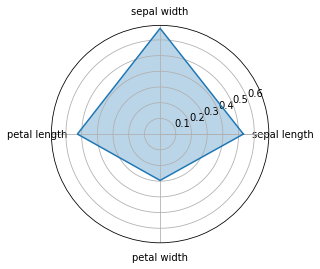

In [43]:
list_mean_df01 += list_mean_df01[:1]

plt.polar(angles0, list_mean_df01)
# color the area inside

plt.fill(angles0, list_mean_df01, alpha=0.3)
plt.xticks(angles0, categories)


plt.show()

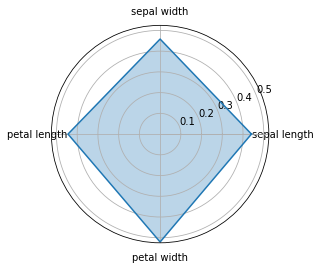

In [44]:
list_mean_df02 += list_mean_df02[:1]

plt.polar(angles0, list_mean_df02)
# color the area inside

plt.fill(angles0, list_mean_df02, alpha=0.3)
plt.xticks(angles0, categories)


plt.show()